## PART ONE POJECT BASED

# Have to change below

* DOMAIN: Healthcare



*  CONTEXT:  
Medical  research  university  X  is  undergoing  a  deep  research  on  patients  with  certain  conditions. University  has  an  internal  AI  team.  Due  to  confidentiality  the  patient’s  details  and  the  conditions  are  masked  by the  client  by  providing  different  datasets  to  the  AI  team  for  developing  a  AIML  model  which  can  predict  the condition of the patient depending on the received test results.

In [1]:
#importing all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
import warnings
sns.set_style('darkgrid')
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score,recall_score,precision_score
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold,KFold
from sklearn import model_selection
from imblearn.over_sampling import SMOTENC
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler

In [2]:
#importing all the data

df1 = pd.read_csv('Part1 - Normal.csv')
df2 = pd.read_csv('Part1 - Type_H.csv')
df3 = pd.read_csv('Part1 - Type_S.csv')

In [3]:
#checking the shape and size of the different dataframes

print('The shape of the first dataframe:',df1.shape)
print('The shape of the second dataframe:',df2.shape)
print('The shape of the third dataframe:',df3.shape)

The shape of the first dataframe: (100, 7)
The shape of the second dataframe: (60, 7)
The shape of the third dataframe: (150, 7)


In [4]:
#Merging all the dataframes into one singe dataframe

df = pd.concat([df1, df2, df3],axis = 0,sort = False,ignore_index = True)

In [5]:
#checking the shape of the merged dataframe

df.shape

(310, 7)

In [6]:
#checking the types and column and their types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  310 non-null    float64
 1   P_tilt       310 non-null    float64
 2   L_angle      310 non-null    float64
 3   S_slope      310 non-null    float64
 4   P_radius     310 non-null    float64
 5   S_Degree     310 non-null    float64
 6   Class        310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [7]:
#checking the column types

df.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

In [8]:
#checking for nulls

df.isnull().sum()

P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

In [9]:
#checking the unique values of the target class

df['Class'].unique()

array(['Normal', 'Nrmal', 'Type_H', 'type_h', 'Type_S', 'tp_s'],
      dtype=object)

In [10]:
#Replacing the value to their respective classes

df['Class'].replace(to_replace = ['type_h','Nrmal','tp_s'],value = ['Type_H','Normal','Type_S'],inplace = True)

In [11]:
#Checking the value of the target class

df['Class'].value_counts()

Type_S    150
Normal    100
Type_H     60
Name: Class, dtype: int64

In [12]:
df.describe().T

count        mean        std        min         25%         50%  \
P_incidence  310.0   60.496653  17.236520  26.147921   46.430294   58.691038   
P_tilt       310.0   17.542822  10.008330  -6.554948   10.667069   16.357689   
L_angle      310.0   51.930930  18.554064  14.000000   37.000000   49.562398   
S_slope      310.0   42.953831  13.423102  13.366931   33.347122   42.404912   
P_radius     310.0  117.920655  13.317377  70.082575  110.709196  118.268178   
S_Degree     310.0   26.296694  37.559027 -11.058179    1.603727   11.767934   

                    75%         max  
P_incidence   72.877696  129.834041  
P_tilt        22.120395   49.431864  
L_angle       63.000000  125.742385  
S_slope       52.695888  121.429566  
P_radius     125.467674  163.071041  
S_Degree      41.287352  418.543082

* ### P_incidence: 
Mean and median are almost equal and 75% of the values are below 72.877696 but the max is 129.834041 which might be an outlier
* ### P_tilt:
Mean and median are almost equal, the min value is a negative value , there might be an outlier since the max value is greater than the 75%
* ### L_angle
Mean and median are almost equal,there might be an outlier since the max value is greater than the 75%
* ### S_slope
Mean and median are equal,there might be an outlier since the max value is greater than the 75%
* ### P_radius
Mean and median are almost equal,there might be an outlier since the max value is greater than the 75%
* ### S_Degree
Mean is greater that the median, there might be skew right skewness,the min value is a negative value,there might be an outlier since the max value is greater than the 75%

## Univariate Analysis

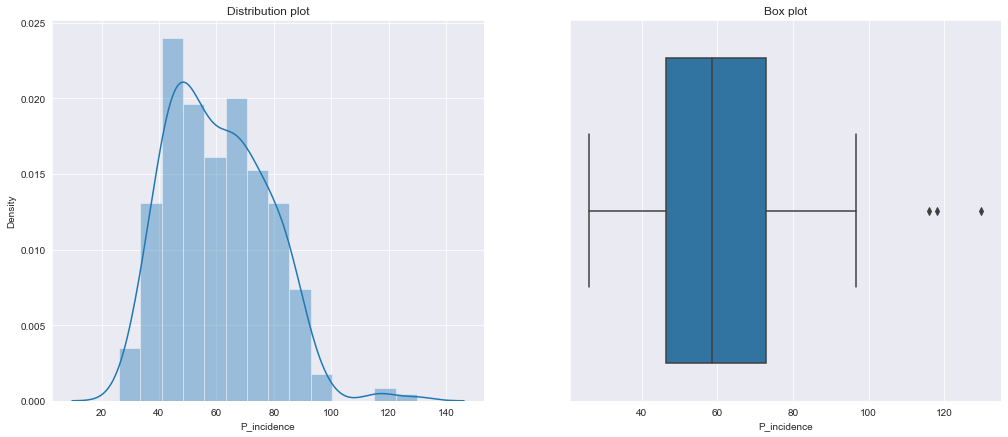

In [13]:
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'P_incidence', data=df,  orient='h' , ax=axes[1]);
sns.distplot(df['P_incidence'],  ax=axes[0]);
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()

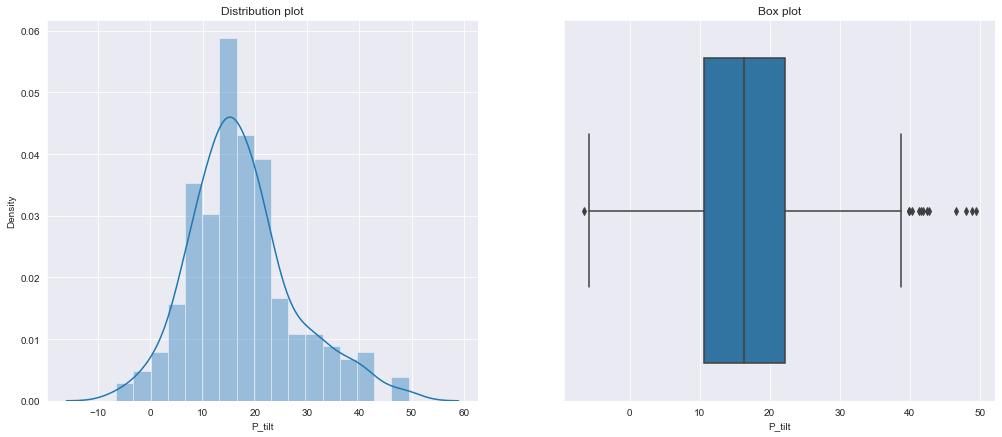

In [14]:
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'P_tilt', data=df,  orient='h' , ax=axes[1])
sns.distplot(df['P_tilt'],  ax=axes[0])
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()

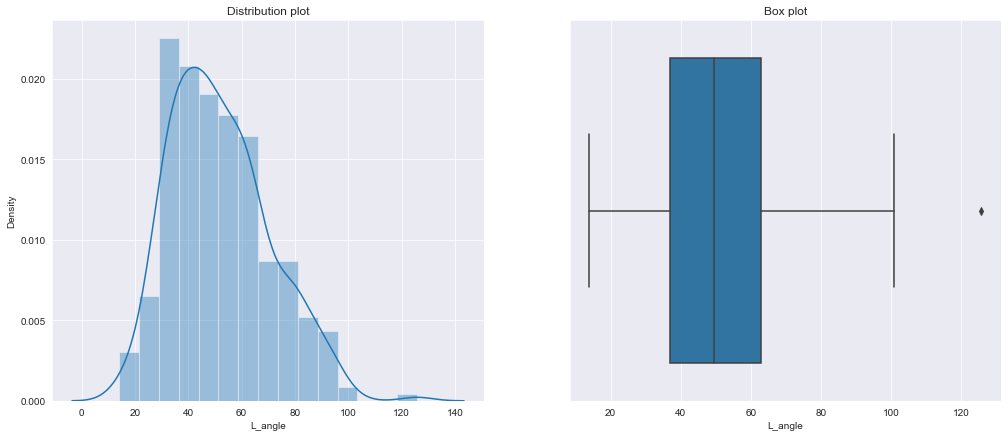

In [15]:
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'L_angle', data=df,  orient='h' , ax=axes[1])
sns.distplot(df['L_angle'],  ax=axes[0])
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()

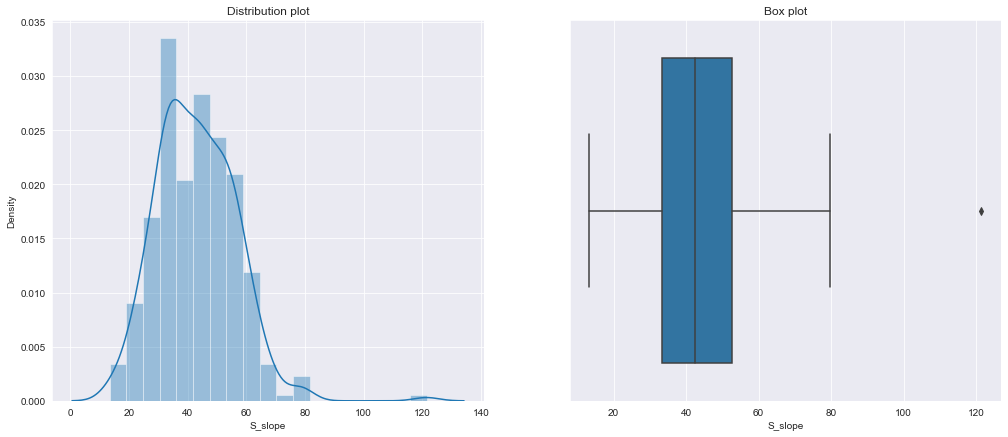

In [16]:
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'S_slope', data=df,  orient='h' , ax=axes[1])
sns.distplot(df['S_slope'],  ax=axes[0])
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()

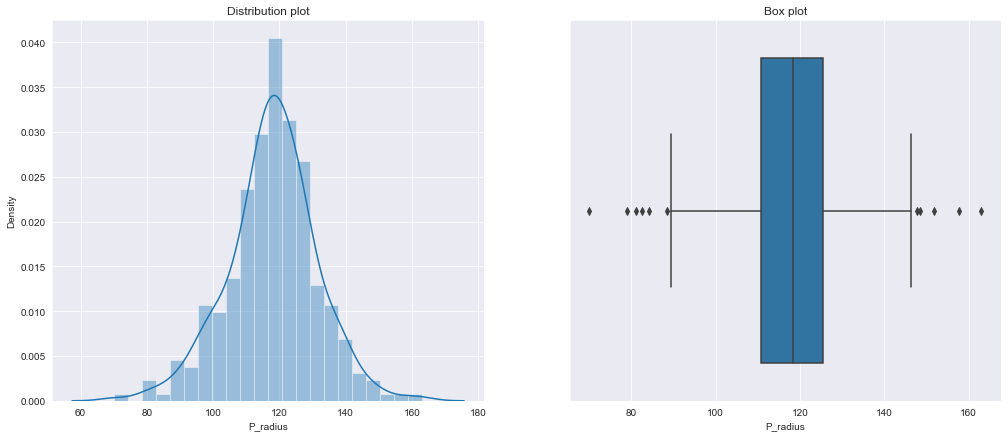

In [17]:
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'P_radius', data=df,  orient='h' , ax=axes[1])
sns.distplot(df['P_radius'],  ax=axes[0])
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()

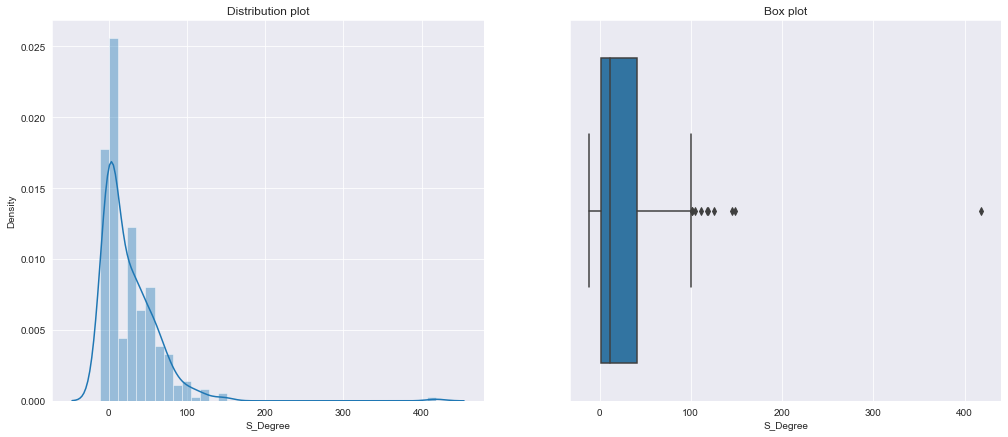

In [18]:
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'S_Degree', data=df,  orient='h' , ax=axes[1])
sns.distplot(df['S_Degree'],  ax=axes[0])
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()

* ### P_incidence
It almost follows a normal distribution and very few outliers can be found
* ### P_tilt
It almost follows a normal distribution with one peak in the center,there is a slight skewness towards the right side due to the presence of outliers
* ### L_angle
It is normally distributed and very slight skewness due to the one outlier
* ### S_slope
It is normally distributed and very slight skewness due to the one outlier
* ### P_radius
It is normally distributed and there is a peak at the center, there are outliers at both extremes
* ### S_Degree
It is right skewed

## Bi-Variate Analysis

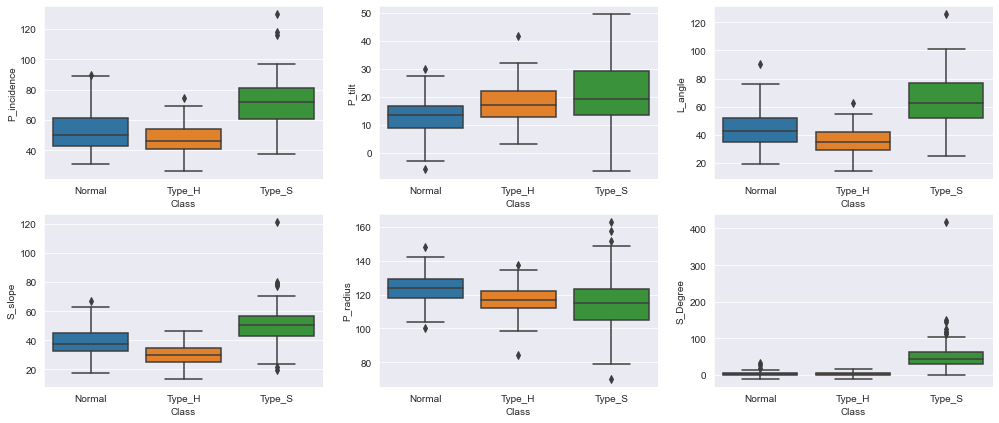

In [19]:
f, axes = plt.subplots(2, 3, figsize=(17,7))
sns.boxplot(x = 'Class',y = 'P_incidence',data = df,ax = axes[0][0]);
sns.boxplot(x = 'Class',y = 'P_tilt',data = df,ax = axes[0][1]);
sns.boxplot(x = 'Class',y = 'L_angle',data = df,ax = axes[0][2]);
sns.boxplot(x = 'Class',y = 'S_slope',data = df,ax = axes[1][0]);
sns.boxplot(x = 'Class',y = 'P_radius',data = df,ax = axes[1][1]);
sns.boxplot(x = 'Class',y = 'S_Degree',data = df,ax = axes[1][2]);

* ### Type_S:
Class belonging to Type_S has higher mean for almost all the variables
* ### Normal
Class belonging to Normal is higher than Type_H when variables are P_incidence,L_angel,S_slope,P_radius
* ### Type_H
Class belonging to Type_H has lower mean for almost all the variables

## Multivariate Analysis

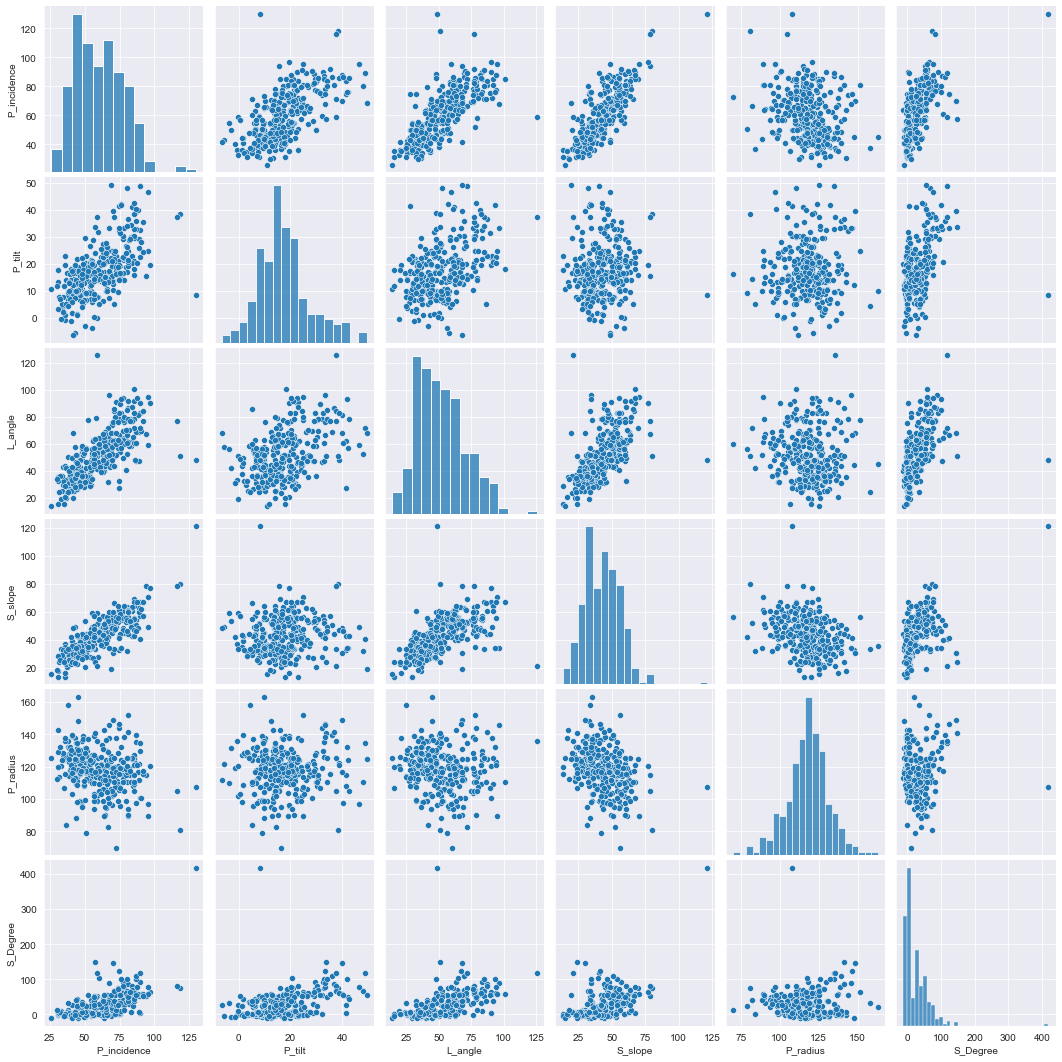

In [20]:
sns.pairplot(data = df);

Along the diagonal we can see the distribution of individual variable

P_incidence has postive correlation with all variables except P_radius. Correlation is higher for S_slope and L_angle

P_tilt has Higher correlation with P_incidence and L_angle.There is no/min correlation with s_slope and p_radius

L_angle has postive correlation with p_tilt,s_slope and s_degree. It has no/min corrilation with P_radius

s_slope has positive correlation with L_angle and s_degree

p_radius has no/min correlation with s_degree,p_tilt,l_angle.

S_degree has no strong positive correlation with any of the variables.

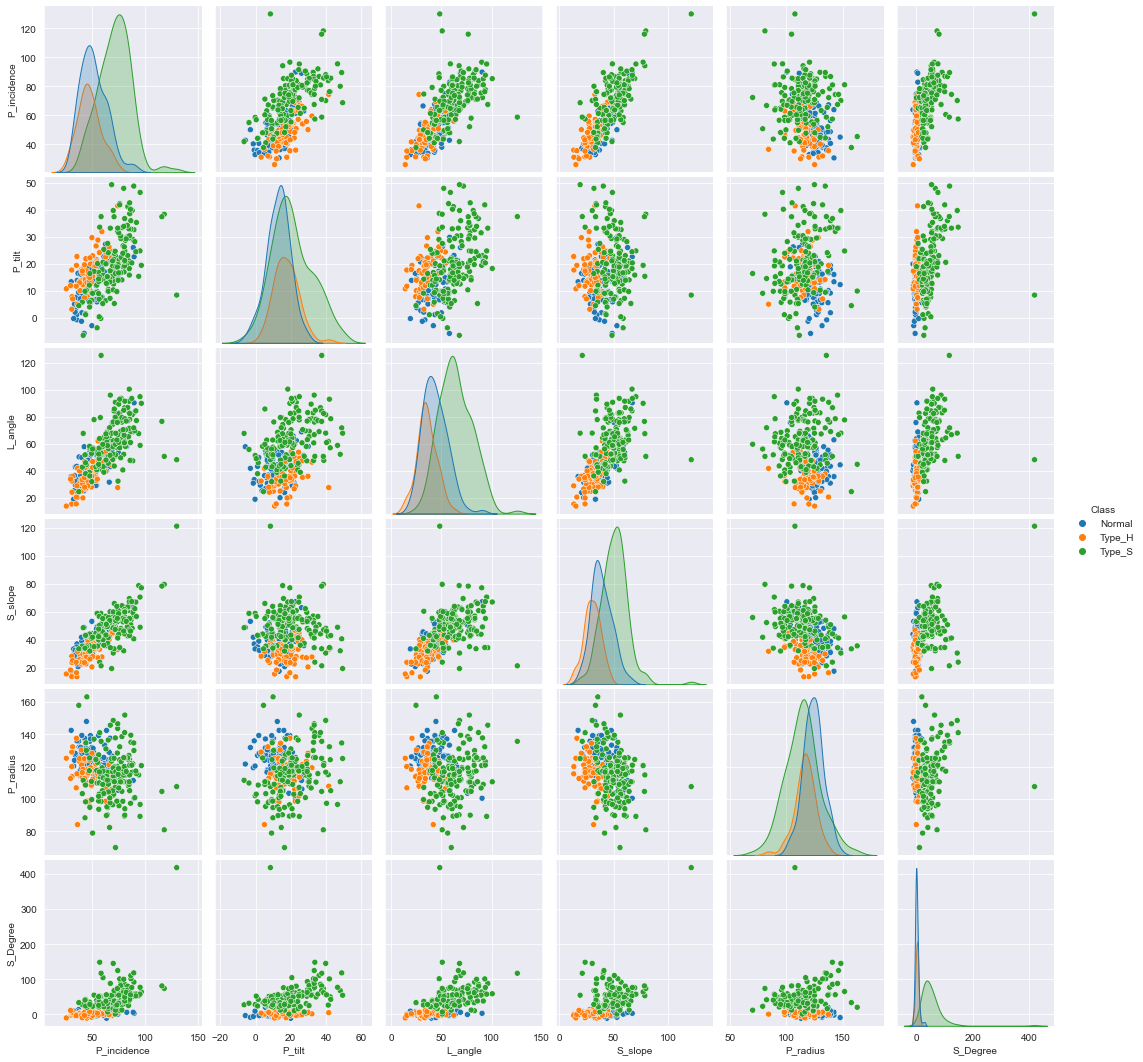

In [21]:
sns.pairplot(data = df,hue = 'Class');

*  The distribution of all the 3 classes are overlapping and there is no specific limit 
  where we can train the model on, so the model should be trained on the entire range of values for all the variables

Text(0.5, 1.0, 'Correlation Matrix of Data')

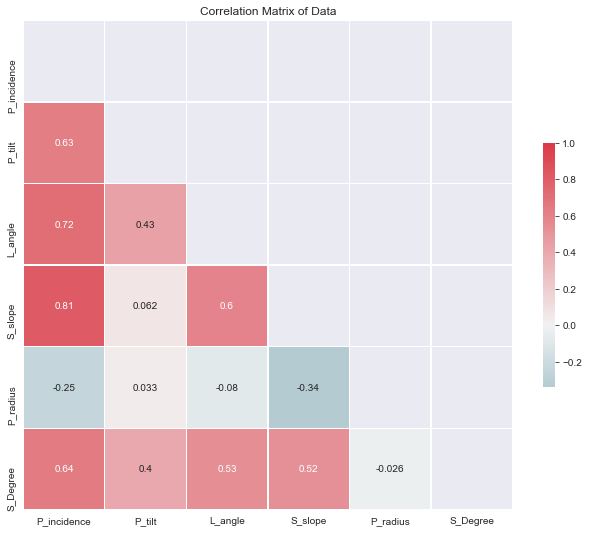

In [22]:
corr = df.corr()

mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize = (11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap = True)

sns.heatmap(corr, mask = mask, cmap = cmap, vmax = 1, center = 0, square = True, 
            linewidths = .5, cbar_kws = {"shrink": .5}, annot = True)
ax.set_title('Correlation Matrix of Data')

* P_incidence:
  * Positive Correlation with S_slope is high 0.81
  * Positive Correlation with L_angle is moderately correlated of 0.72
  * Correlation with P_radius is almost 0
* P_tilt
  * Positive Correlation with P_incidence of 0.63
* L_angle 
  * Positive Correlation with P_incidence with 0.72
  * Negative correlation with P_radius -0.08
* S_slope
  * Positive correlation with P_incidence is high 0.81
  * Positive correlation with S_degree is 0.52
* P_radius
  * Negative correlation with S_degree is -0.026

In [23]:
dfcol=['P_incidence','P_tilt','L_angle','S_slope','P_radius','S_Degree']
for i in dfcol:
    df_normal=df[df.Class=='Normal'][i]
    df_typeH=df[df.Class=='Type_H'][i]
    df_typeS=df[df.Class=='Type_S'][i]
    f_stats,p_value=stats.f_oneway(df_normal,df_typeH,df_typeS)
    print('{} p_value: {}'.format('\033[1m',p_value))
    if p_value < 0.05:  # Setting our significance level at 5%
        print('{} Rejecting Null Hypothesis.Class types has efect on {}'.format('\033[1m',i))
    else:
        print('{} Fail to Reject Null Hypothesis.Class types has no effect on {}'.format('\033[1m',i))
    print('\n')

 p_value: 8.752848964938295e-34
 Rejecting Null Hypothesis.Class types has efect on P_incidence


 p_value: 2.176879152985521e-09
 Rejecting Null Hypothesis.Class types has efect on P_tilt


 p_value: 5.357329394004833e-38
 Rejecting Null Hypothesis.Class types has efect on L_angle


 p_value: 2.175670364983569e-31
 Rejecting Null Hypothesis.Class types has efect on S_slope


 p_value: 1.1219959042394205e-07
 Rejecting Null Hypothesis.Class types has efect on P_radius


 p_value: 5.1147320770401214e-39
 Rejecting Null Hypothesis.Class types has efect on S_Degree




In [24]:
# imputing the outliers with the mean value

col=['P_incidence','P_tilt','L_angle','S_slope','P_radius','S_Degree']
for c in col:
    #getting upper lower quartile values
    q25,q75=np.percentile(df[c],25),np.percentile(df[c],75)
    IQR=q75-q25
    Threshold=IQR*1.5
    lower,upper=q25-Threshold,q75+Threshold
    #taking mean of a column without considering outliers
    df_include = df.loc[(df[c] >= lower) & (df[c] <= upper)]
    mean=int(df_include[c].mean())
    #imputing outliers with mean
    df[c]=np.where(df[c]>upper,mean,df[c])
    df[c]=np.where(df[c]<lower,mean,df[c])


In [25]:
#label encoding the target variable

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])

In [26]:
#Segregating predictors and target attributes

X = df.drop(['Class'],axis = 1)
y = df['Class']

In [27]:
#performing normalisation the the predictors

X_zscore=X.apply(zscore)

In [28]:
#checking for target balancing 

display(df['Class'].value_counts(), df['Class'].value_counts(normalize = True)*100)

2    150
0    100
1     60
Name: Class, dtype: int64

2    48.387097
0    32.258065
1    19.354839
Name: Class, dtype: float64

#### The Type_S has the highest number of counts of 150 and contributes to almost 50 percent of the data. The Normal class is the next highest with over 100 and contributing to over 32 percent of the target class. But this imbalance of the Target class is not at all a problem for the K-NN algorithm 

In [29]:
#performing train test split

X_train, X_test, y_train, y_test = train_test_split(X_zscore, y, test_size = 0.3,random_state = 10)

In [30]:
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(217, 6)

(93, 6)

(217,)

(93,)

In [31]:
#Designing and Training the a KNN Classifier

KNN = KNeighborsClassifier(n_neighbors= 9)
KNN.fit(X_train, y_train)
predicted_labels = KNN.predict(X_test)

In [33]:
#Displaying the classification accuracy for train and test data

print('Accuracy on Training data:',KNN.score(X_train, y_train) )
print('Accuracy on Test data:',KNN.score(X_test, y_test) )

Accuracy on Training data: 0.8571428571428571
Accuracy on Test data: 0.7849462365591398


Training Acuracy is 0.85 and Testing Accuracy is 0.78. Performance is less in test data.

This is due to overfitting of data

In [34]:
print("classification  Matrix:\n",classification_report(y_test,predicted_labels))

classification  Matrix:
               precision    recall  f1-score   support

           0       0.69      0.64      0.67        28
           1       0.58      0.78      0.67        18
           2       0.95      0.87      0.91        47

    accuracy                           0.78        93
   macro avg       0.74      0.76      0.75        93
weighted avg       0.80      0.78      0.79        93



* 0 - Normal
* 1 - Type_H
* 2 - Type_S

* A Classification report is used to measure the quality of predictions from a classification algorithm. How many predictions     are True and how many are False. True Positives, False Positives, True negatives and False Negatives are used to predict the     metrics of a classification report


* TN / True Negative: when a case was negative and predicted negative
* TP / True Positive: when a case was positive and predicted positive
* FN / False Negative: when a case was positive but predicted negative
* FP / False Positive: when a case was negative but predicted positive
  
  
* Precision is the ability of a classifier not to label an instance positive that is actually negative. For each class it is  defined as the ratio of true positives to the sum of true and false positives.
* Precision = TP/(TP + FP)


* Recall is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true         positives to the sum of true positives and false negatives.

* Recall = TP/(TP+FN)


* The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0.           F1 scores are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb,     the weighted average of F1 should be used to compare classifier models, not global accuracy.


* F1 Score = 2*(Recall * Precision) / (Recall + Precision)

Class 0 predicted correctly for 69% of time. Similary for class 1 58% and class 2 95%

we can say that precison and recall is balanced for class 0 by 67% and for class 1 by 67 %

We have maximum F1 score for class 2.

In [35]:
#Automating the taskt to find the best value of K for KNN

myList = list(range(1,53))
neighbors = list(filter(lambda x: x % 2 != 0, myList))

In [36]:
ac_scores = []
for k in neighbors:
    KNN_N = KNeighborsClassifier(n_neighbors= k , metric = 'euclidean' ) 
    KNN_N.fit(X_train, y_train)
    y_pred = KNN_N.predict(X_test)
    scores = accuracy_score(y_test, y_pred)
    ac_scores.append(scores)

MSE = [1 - x for x in ac_scores]
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 5


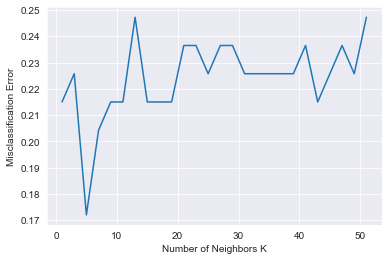

In [37]:
# plot misclassification error vs k

plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [38]:
#using GridSearchCV to find the best KNN model with the optimal K value

KNN = KNeighborsClassifier()

params = {'n_neighbors': [5], 'weights': ['uniform', 'distance'],
          'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

skf = StratifiedKFold(n_splits = 10)
KNN_hyper = GridSearchCV(KNN, param_grid = params, n_jobs = -1, cv = skf)

KNN_hyper.fit(X_train, y_train)

print('k-Nearest Neighbor Classifier Scores With Hyperparameter Tuning\n\n')
print('Best Hyper Parameters are: ', KNN_hyper.best_params_)
print('\nBest Score is: ', KNN_hyper.best_score_.round(3))

print('k-NN accuracy for train set: {0:.3f}'.format(KNN_hyper.score(X_train, y_train)))
print('k-NN accuracy for test set: {0:.3f}'.format(KNN_hyper.score(X_test, y_test)))

y_true, y_pred = y_test, KNN_hyper.predict(X_test)

# Accuracy Score
auc = accuracy_score(y_true, y_pred)
print('\nAccuracy Score:\n', auc.round(3))


k-Nearest Neighbor Classifier Scores With Hyperparameter Tuning


Best Hyper Parameters are:  {'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'}

Best Score is:  0.821
k-NN accuracy for train set: 0.880
k-NN accuracy for test set: 0.828

Accuracy Score:
 0.828


From the GridSearchCV and with the help of finding the best value of K. We come to the conclusion that we will use these hyperparameters to train our model for the best accuracy possible

In [39]:
KNN_final = KNeighborsClassifier(algorithm =  'auto', n_neighbors = 5, weights = 'uniform')
KNN_final.fit(X_train, y_train)
y_true, y_pred = y_test, KNN_final.predict(X_test)

print('k-NN accuracy for train set: {0:.3f}'.format(KNN_final.score(X_train, y_train)))
print('k-NN accuracy for test set: {0:.3f}'.format(KNN_final.score(X_test, y_test)))

# Classification Report
print('\n{}'.format(classification_report(y_true, y_pred)))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print('\nConfusion Matrix:\n', cm)

# Accuracy Score
auc = accuracy_score(y_true, y_pred)
print('\nAccuracy Score:\n', auc.round(3))

k-NN accuracy for train set: 0.880
k-NN accuracy for test set: 0.828

              precision    recall  f1-score   support

           0       0.77      0.71      0.74        28
           1       0.60      0.83      0.70        18
           2       1.00      0.89      0.94        47

    accuracy                           0.83        93
   macro avg       0.79      0.81      0.79        93
weighted avg       0.85      0.83      0.84        93


Confusion Matrix:
 [[20  8  0]
 [ 3 15  0]
 [ 3  2 42]]

Accuracy Score:
 0.828


### The best trained model is the model with  {'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'} for the given dataset. The reasons for selecting this model is because it doesn't overfit that much when compared to our model with neighbours of 9. It can be seen that the F1-Score of all the classes has imporved significantly and also the precision of Class 2 (Type_S) is 1.00. The testing Accuracy is also around 83 percent which is much better that the previous model

* All the variables has significant effect on target class

* Class belongs to type_s has higher mean value for alomst all variables 

* Class belongs to normal has lower values for all variables

* For almost all variables the distribution is normal

* Clear description on each variables may help to understand problem statement better because of medical domain

* type_h, Nrmal and tp_s in the target class might be typo.

* Equal distribution of the target class is needed to increase the overall accuracy

* Clear description about the target class such as which one is more severe than the other, which might help us to build model     according taking into account the Precision and Recall.

* Features like Age, Sex and Placement of the biomechanic for example shoulder,knees will definitely help the model to get a       better accuracy

* The features of P_titl and S_Degree are in negative which might be a typo but also cannot be removed because no clear description or the units for the features are given

## Project 2

* DOMAIN: Banking and finance


* CONTEXT:  A  bank  X  is  on  a  massive  digital  transformation  for  all  its  departments.  Bank  has  a  growing  customer  base  whee majority of them are liability customers (depositors) vs borrowers (asset customers).   The bank is interested in expanding the borrowers  base  rapidly  to  bring  in  more  business  via  loan  interests.  A  campaign  that  the  bank  ran  in  last  quarter  showed  an average  single  digit  conversion  rate.  Digital  transformation  being  the  core  strength  of  the  business  strategy,  marketing department wants to devise effective campaigns with better target marketing to increase the conversion ratio to double digit with same budget as per last campaign.

In [40]:
#importing all the given dataset

bank1 = pd.read_csv('Part2 - Data1.csv')
bank2 = pd.read_csv('Part2 -Data2.csv')

In [41]:
#checking the shape and size of the different dataframes

print('The shape of the first dataframe:',bank1.shape)
print('The shape of the second dataframe:',bank2.shape)

The shape of the first dataframe: (5000, 8)
The shape of the second dataframe: (5000, 7)


In [42]:
#merging both the dataframes on ID

bank=bank1.merge(bank2,left_on='ID',right_on='ID')

In [43]:
#checking the shape and size of the final dataframe

bank.shape

(5000, 14)

In [44]:
#checking the types of all the columns in the dataframe

bank.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object

In [45]:
#checking for nulls in the data

bank.isnull().sum()

ID                      0
Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

In [46]:
#dropping the null values in the dataset

bank.dropna(axis=0,inplace=True)

In [47]:
#dropping the ID column

bank.drop('ID',axis=1,inplace=True)

In [48]:
bank.describe().T

count          mean          std     min      25%  \
Age                  4980.0     45.352610    11.464212    23.0     35.0   
CustomerSince        4980.0     20.117671    11.468716    -3.0     10.0   
HighestSpend         4980.0     73.852410    46.070090     8.0     39.0   
ZipCode              4980.0  93152.420482  2123.660073  9307.0  91911.0   
HiddenScore          4980.0      2.395582     1.147200     1.0      1.0   
MonthlyAverageSpend  4980.0      1.939536     1.750006     0.0      0.7   
Level                4980.0      1.880924     0.840144     1.0      1.0   
Mortgage             4980.0     56.589759   101.836758     0.0      0.0   
Security             4980.0      0.104418     0.305832     0.0      0.0   
FixedDepositAccount  4980.0      0.060643     0.238697     0.0      0.0   
InternetBanking      4980.0      0.597189     0.490513     0.0      0.0   
CreditCard           4980.0      0.294378     0.455808     0.0      0.0   
LoanOnCard           4980.0      0.096386     0.295149     0.0      0.0   

                         50%        75%      max  
Age                     45.0     55.000     67.0  
CustomerSince           20.0     30.000     43.0  
HighestSpend            64.0     98.000    224.0  
ZipCode              93407.0  94608.000  96651.0  
HiddenScore              2.0      3.000      4.0  
MonthlyAverageSpend      1.5      2.525     10.0  
Level                    2.0      3.000      3.0  
Mortgage                 0.0    101.000    635.0  
Security                 0.0      0.000      1.0  
FixedDepositAccount      0.0      0.000      1.0  
InternetBanking          1.0      1.000      1.0  
CreditCard               0.0      1.000      1.0  
LoanOnCard               0.0      0.000      1.0

* ### Age: 
Mean and median are equal and 75% of the values are below 55 but the max is 67 which might be an outlier
* ### CustomerSince:
Mean and median are equal, the min value of CustomerSince is in negative which might be due to human error, there is also outlier present
* ### HighestSpend:
Mean is greater than the median, the data is skewed to the right with outliers
* ### ZipCode:
The min value of zipcode is 9307 which may be due to human error
* ### HiddenScore:
It is a categorical varaiable which has values from 1 to 4
* ### MonthlyAverageSpend:
Mean and median are almost and there are outliers
* ### Level:
Level is a categorical varaible which has values from 1 to 3
* ### Mortgage:
Mean is very much greater than the median which means that the distribution is heavily skewed on the right side
* ### Security:
Security is a binary categorical variable which has values for 0 to 1
* ### FixedDepositAccount:
FixedDepositAccount is a binary categorical variable which has values for 0 to 1
* ### InternetBanking:
InternetBanking is a binary categorical variable which has values for 0 to 1
* ### CreditCard
CreditCard is a binary categorical variable which has values for 0 to 1
* ### LoanOnCard
LoanOnCard is a binary categorical variable which has values for 0 to 1

##### CustomerSince cannot be a negative value becomes it denotes the number of years so we will handle this and impute it with the mean median with it's neighbours

In [49]:
bank[bank['CustomerSince']<0].describe().T

count          mean          std      min      25%  \
Age                   51.0     24.509804     1.488255     23.0     24.0   
CustomerSince         51.0     -1.450980     0.642300     -3.0     -2.0   
HighestSpend          51.0     69.098039    37.836625     12.0     40.5   
ZipCode               51.0  93220.137255  1620.610688  90065.0  92162.5   
HiddenScore           51.0      2.843137     0.966903      1.0      2.0   
MonthlyAverageSpend   51.0      2.126078     1.767813      0.2      1.0   
Level                 51.0      2.058824     0.834548      1.0      1.0   
Mortgage              51.0     44.450980    90.709495      0.0      0.0   
Security              51.0      0.117647     0.325396      0.0      0.0   
FixedDepositAccount   51.0      0.000000     0.000000      0.0      0.0   
InternetBanking       51.0      0.588235     0.497050      0.0      0.0   
CreditCard            51.0      0.274510     0.450708      0.0      0.0   
LoanOnCard            51.0      0.000000     0.000000      0.0      0.0   

                         50%       75%      max  
Age                     24.0     25.00     29.0  
CustomerSince           -1.0     -1.00     -1.0  
HighestSpend            62.0     82.00    150.0  
ZipCode              93014.0  94720.00  95842.0  
HiddenScore              3.0      4.00      4.0  
MonthlyAverageSpend      1.8      2.35      7.2  
Level                    2.0      3.00      3.0  
Mortgage                 0.0      0.00    314.0  
Security                 0.0      0.00      1.0  
FixedDepositAccount      0.0      0.00      0.0  
InternetBanking          1.0      1.00      1.0  
CreditCard               0.0      1.00      1.0  
LoanOnCard               0.0      0.00      0.0

In [50]:
replace_value = bank.loc[(bank['Age'] > 23) & (bank['Age'] <= 29) & (bank['HighestSpend'] > 12) & (bank['HighestSpend'] < 150) & 
         (bank['LoanOnCard'] == 0) & (bank['FixedDepositAccount'] == 0), 'CustomerSince'].median()

In [51]:
bank['CustomerSince'] = np.where(bank['CustomerSince'] < 0, replace_value, bank['CustomerSince'])

In [52]:
bank['HiddenScore'].unique()

array([1, 4, 3, 2], dtype=int64)

In [53]:
bank['Level'].unique()

array([3, 2, 1], dtype=int64)

In [54]:
bank['Security'].unique()

array([0, 1], dtype=int64)

In [55]:
bank['FixedDepositAccount'].unique()

array([0, 1], dtype=int64)

In [56]:
bank['InternetBanking'].unique()

array([0, 1], dtype=int64)

In [57]:
bank['CreditCard'].unique()

array([0, 1], dtype=int64)

## Univariate Analysis

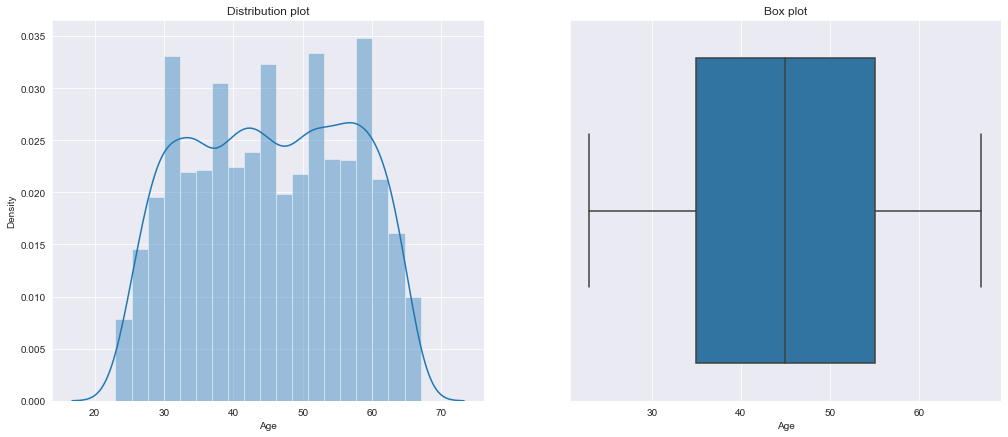

In [58]:
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'Age', data=bank,  orient='h' , ax=axes[1])
sns.distplot(bank['Age'],  ax=axes[0])
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()

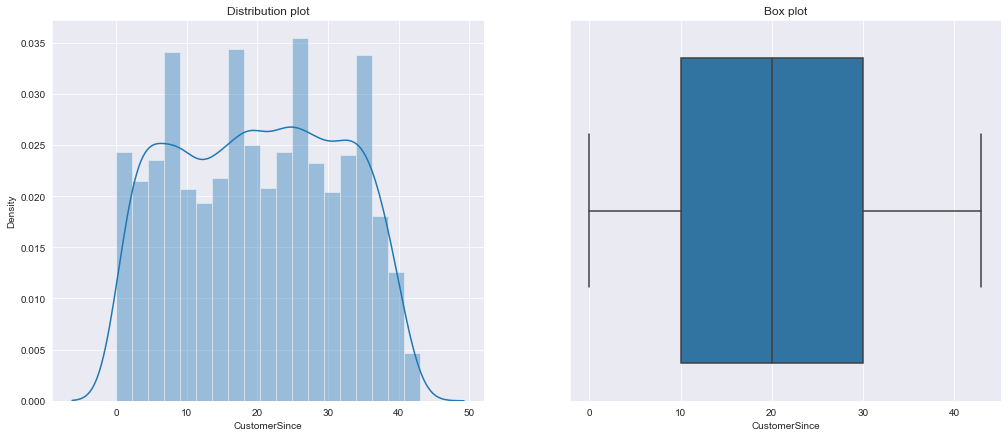

In [59]:
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'CustomerSince', data=bank,  orient='h' , ax=axes[1])
sns.distplot(bank['CustomerSince'],  ax=axes[0])
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()

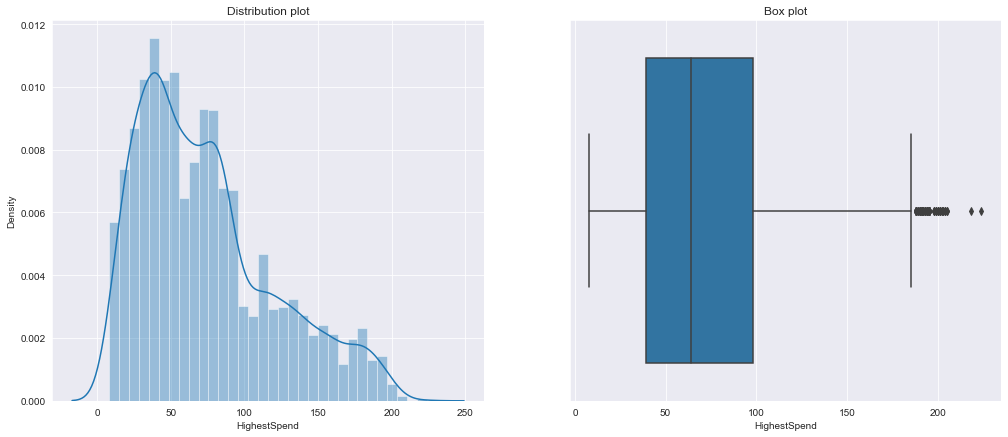

In [60]:
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'HighestSpend', data=bank,  orient='h' , ax=axes[1])
sns.distplot(bank['HighestSpend'],  ax=axes[0])
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()

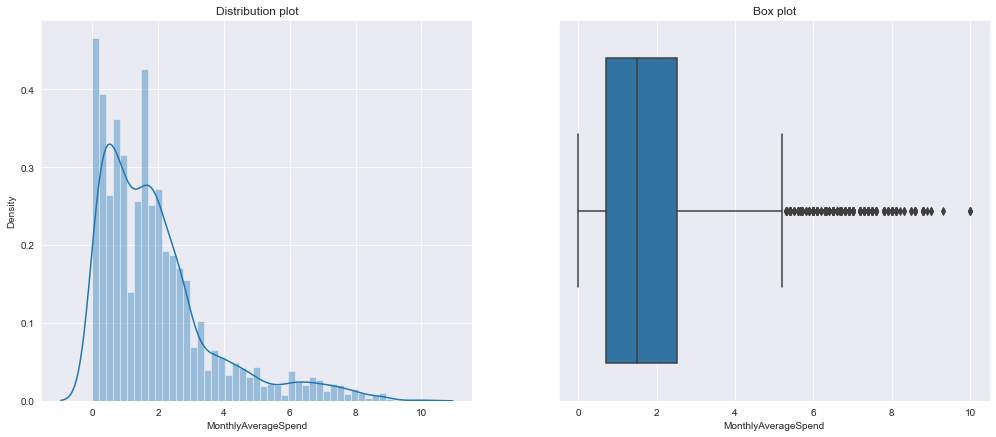

In [61]:
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'MonthlyAverageSpend', data=bank,  orient='h' , ax=axes[1])
sns.distplot(bank['MonthlyAverageSpend'],  ax=axes[0])
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()

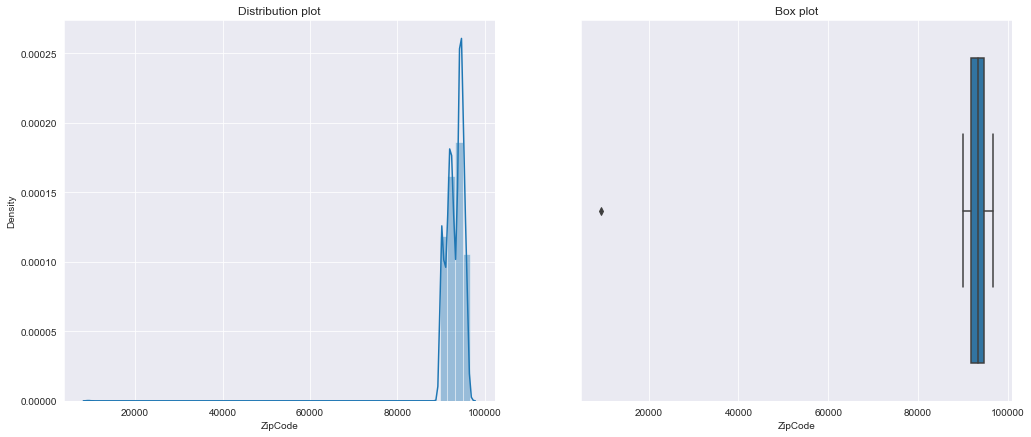

In [62]:
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'ZipCode', data=bank,  orient='h' , ax=axes[1])
sns.distplot(bank['ZipCode'],  ax=axes[0])
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()

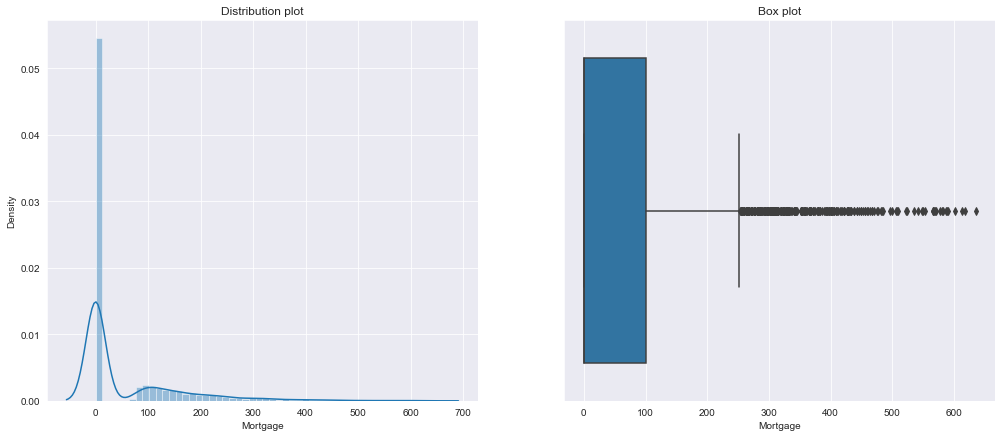

In [63]:
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'Mortgage', data=bank,  orient='h' , ax=axes[1])
sns.distplot(bank['Mortgage'],  ax=axes[0])
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()

* ### Age:
It is a normal distribution and has no outliers

* ### CustomerSince
It is a normal distribution and has no outliers

* ### HighestSpend
It is skewed to the right and has outliers

* ### MonthlyAverageSpend
It is skewed to the right and has outliers

* ### ZipCode
It has an outlier may be due to human error

* ### Mortgage
It is skewed heavily to the right and has a single peak

###### We will drop the values which has been mistyped 

In [64]:
display(bank[bank['ZipCode'] < 20000])

Age  CustomerSince  HighestSpend  ZipCode  HiddenScore  \
384   51           25.0            21     9307            4   

     MonthlyAverageSpend  Level  Mortgage  Security  FixedDepositAccount  \
384                  0.6      3         0         0                    0   

     InternetBanking  CreditCard  LoanOnCard  
384                1           1         0.0

In [65]:
bank.drop(384, axis = 0, inplace = True)

In [66]:
#Imputing the outliers with the mean of the respectivec columns

col=['HighestSpend','MonthlyAverageSpend','Mortgage']
for c in col:
    q25,q75=np.percentile(bank[c],25),np.percentile(bank[c],75)
    IQR=q75-q25
    Threshold=IQR*1.5
    lower,upper=q25-Threshold,q75+Threshold
    bank_include = bank.loc[(bank[c] >= lower) & (bank[c] <= upper)]
    mean=int(bank_include[c].mean())
    bank[c]=np.where(bank[c]>upper,mean,bank[c])
    bank[c]=np.where(bank[c]<lower,mean,bank[c])

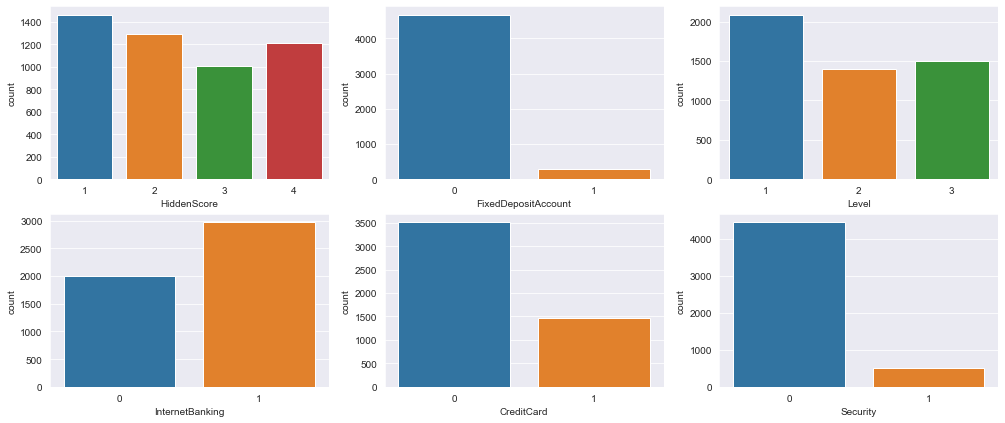

In [67]:
#checking the distribution of the categorical variables

f, axes = plt.subplots(2, 3, figsize=(17,7))
sns.countplot(x = 'HiddenScore',data=bank,ax = axes[0][0]);
sns.countplot(x = 'FixedDepositAccount',data=bank,ax = axes[0][1]);
sns.countplot(x = 'Level',data=bank,ax = axes[0][2]);
sns.countplot(x = 'InternetBanking',data=bank,ax = axes[1][0]);
sns.countplot(x = 'CreditCard',data=bank,ax = axes[1][1]);
sns.countplot(x ='Security',data=bank,ax = axes[1][2]);
plt.show()

* ### HiddenScore
The count of the HiddenScore is almost equal for all the classes

* ### FixedDepositAccount
The count of class which has FixedDepositAccount as 0 is much greater than
the class which has FixedDepositAccount as 1

* ### Level
The count of classes 2 and 3 of Level are the same whereas
the count of class 1 is greater than the other classes

* ### InternetBanking
The count of class 1 is greater than the count of class 0

* ### CreditCard
The count of class 0 is greater than class 1

* ### Security
The count of class 0 is greater than class 1

In [68]:
display(bank['HiddenScore'].value_counts(normalize = True)*100, 
        bank['FixedDepositAccount'].value_counts(normalize = True)*100,
       bank['Level'].value_counts(normalize = True)*100,
       bank['InternetBanking'].value_counts(normalize = True)*100,
       bank['CreditCard'].value_counts(normalize = True)*100,
       bank['Security'].value_counts(normalize = True)*100)

1    29.443663
2    25.969070
4    24.382406
3    20.204860
Name: HiddenScore, dtype: float64

0    93.934525
1     6.065475
Name: FixedDepositAccount, dtype: float64

1    41.956216
3    30.026110
2    28.017674
Name: Level, dtype: float64

1    59.710785
0    40.289215
Name: InternetBanking, dtype: float64

0    70.576421
1    29.423579
Name: CreditCard, dtype: float64

0    89.556136
1    10.443864
Name: Security, dtype: float64

## Bi-Variate Analysis

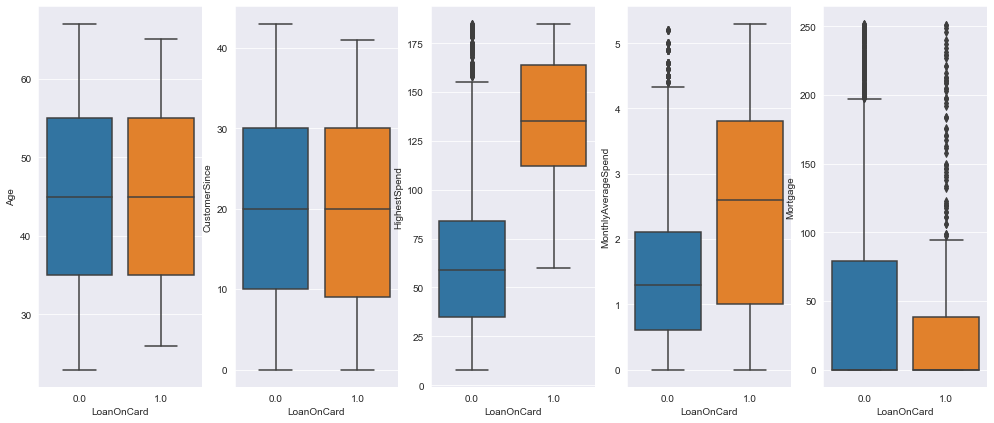

In [69]:
f, axes = plt.subplots(1, 5, figsize=(17,7))
sns.boxplot(x = 'LoanOnCard',y = 'Age',data = bank,ax = axes[0]);
sns.boxplot(x = 'LoanOnCard',y = 'CustomerSince',data = bank,ax = axes[1]);
sns.boxplot(x = 'LoanOnCard',y = 'HighestSpend',data = bank,ax = axes[2]);
sns.boxplot(x = 'LoanOnCard',y = 'MonthlyAverageSpend',data = bank,ax = axes[3]);
sns.boxplot(x = 'LoanOnCard',y = 'Mortgage',data = bank,ax = axes[4]);

* The Mean of the Age and CustomerSince for both the classes of the target variable 
  are the same

* The Mean of HighestSpend and MonthlyAverageSpend is less for the class 0 of LoanOnCard,
  and the mean for the class 1 is much higher

* The Mortage for for Class 0 of LoanOnCard is much higher than Class 1

## Multivariate Analysis

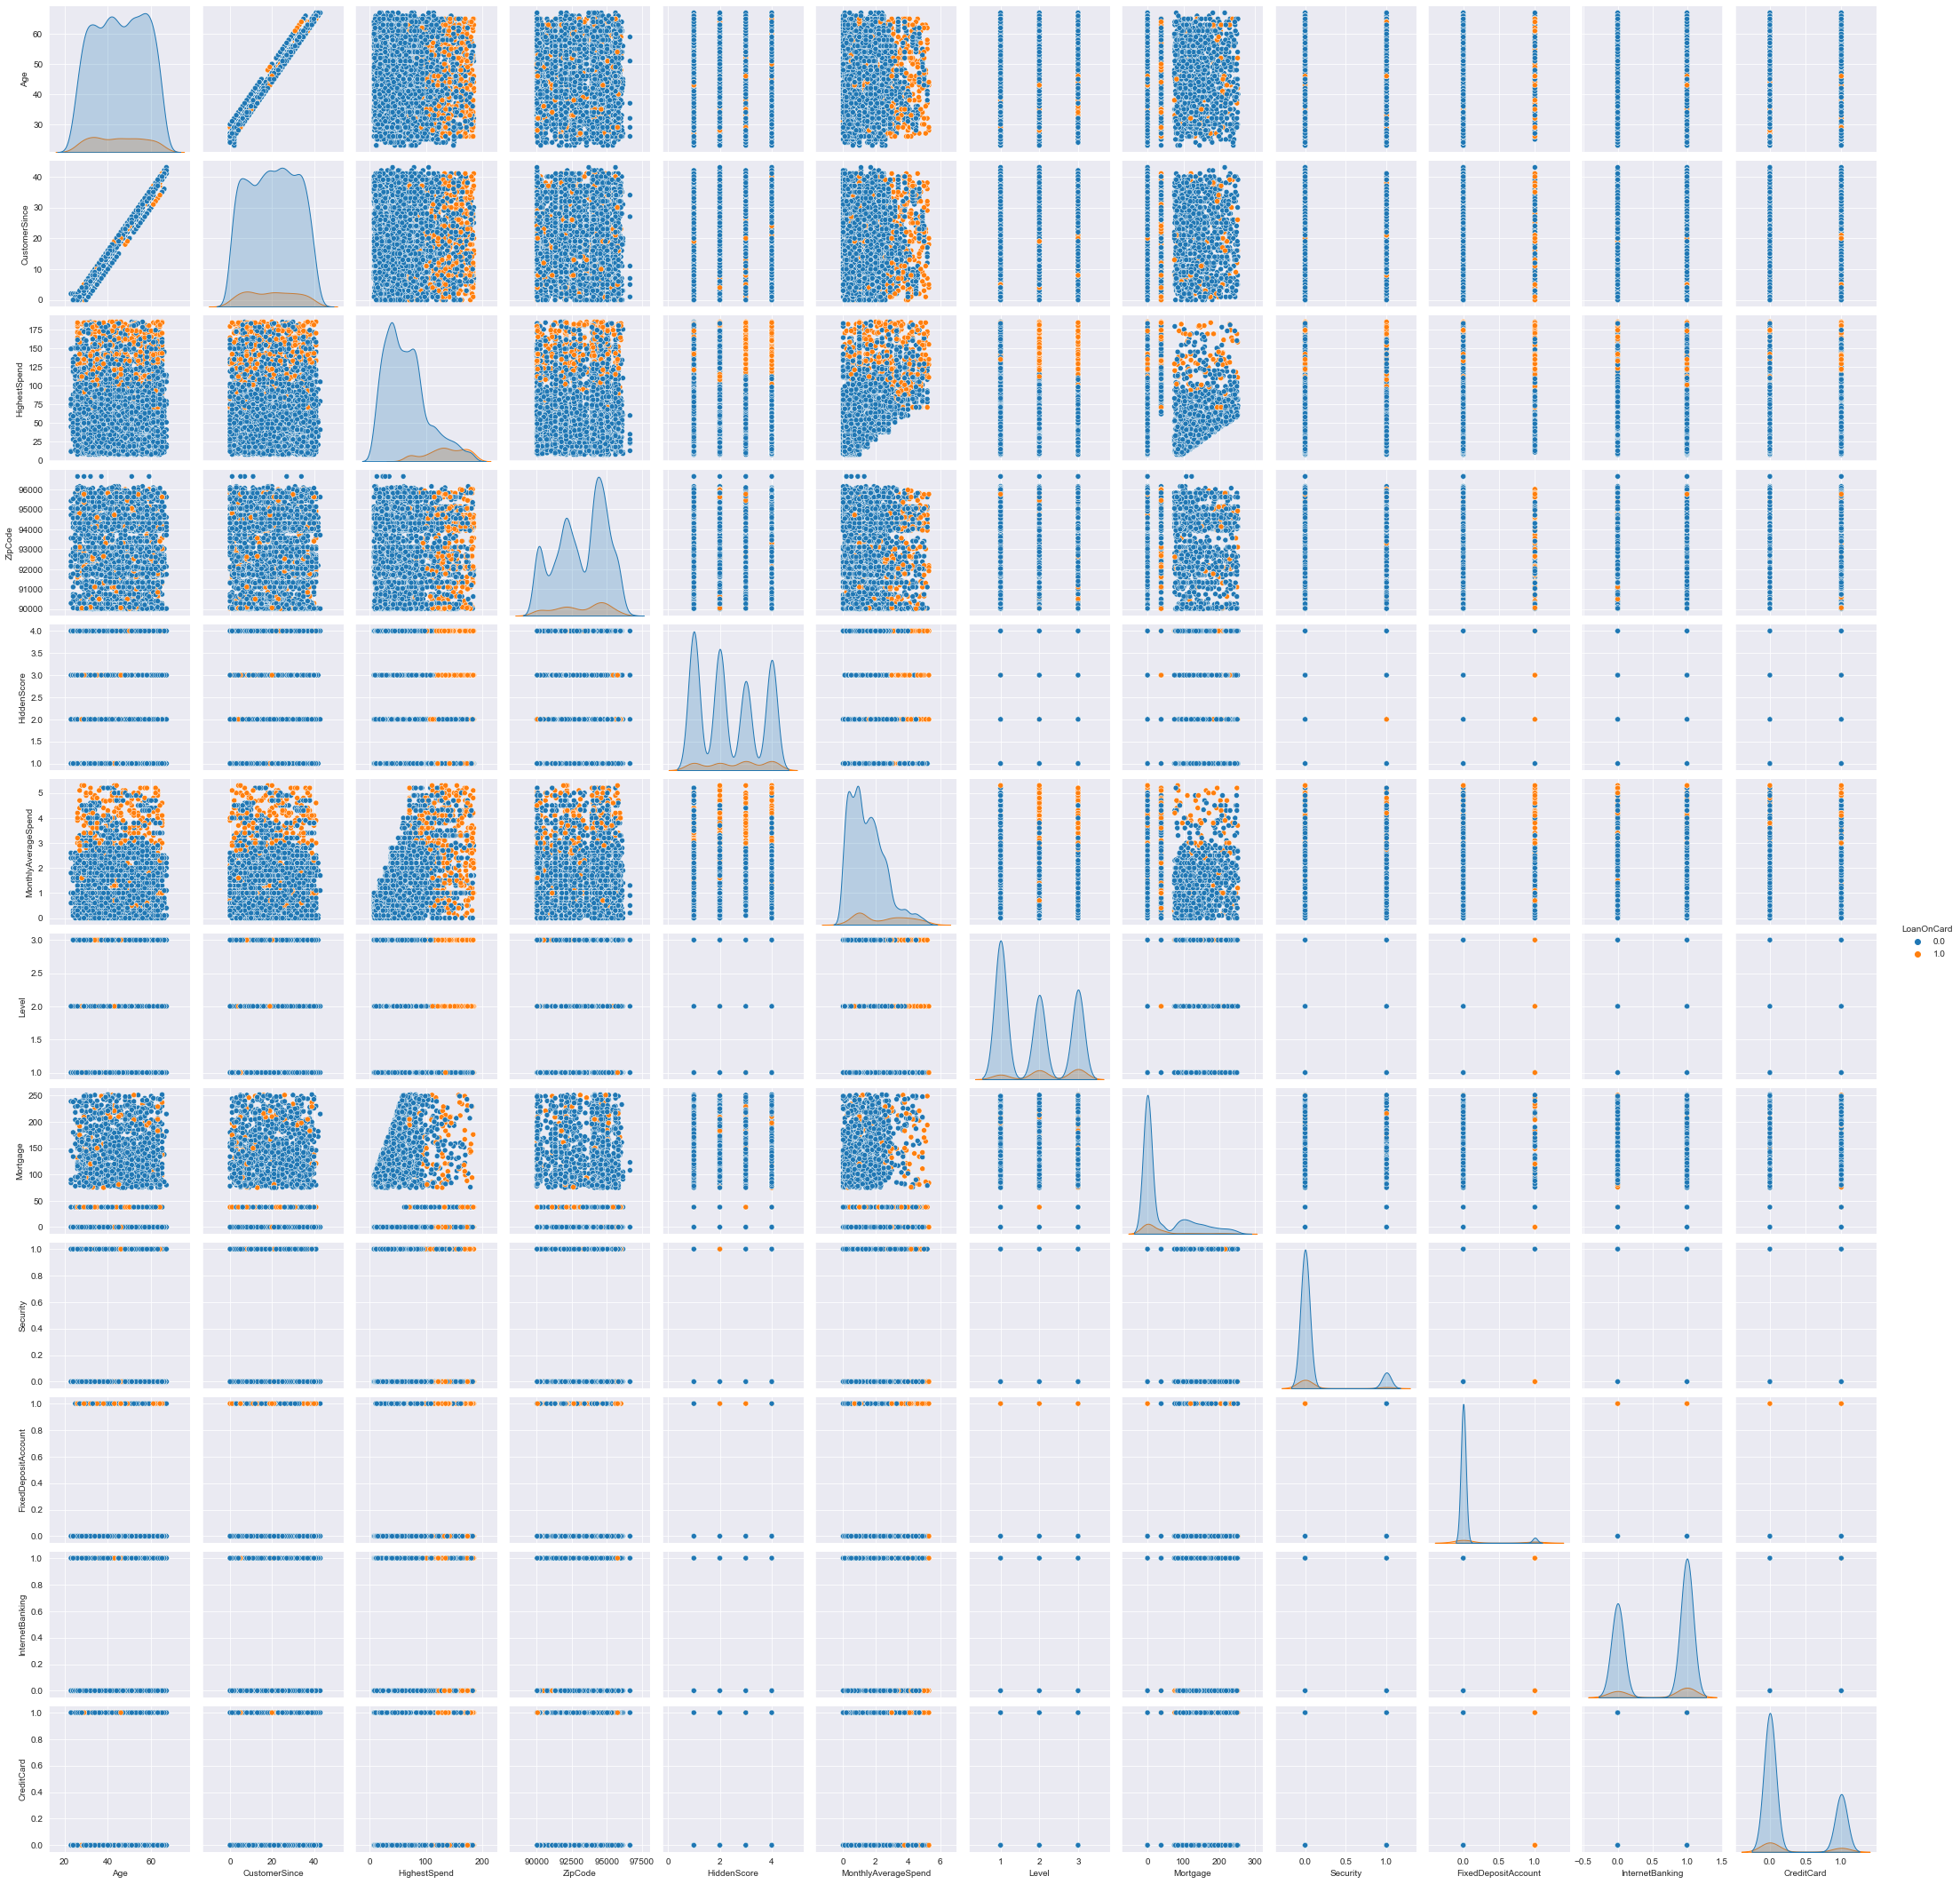

In [70]:
sns.pairplot(data = bank,hue = 'LoanOnCard');

* ##### Age and CustomerSince is very highly correlated
* ##### All the points are overlapping and there are few number of Class 1 of the target variable when compared to the Class 0
* ##### Since the points are overlapping, SVM might be an good model for the best accuracy

Text(0.5, 1.0, 'Correlation Matrix of Data')

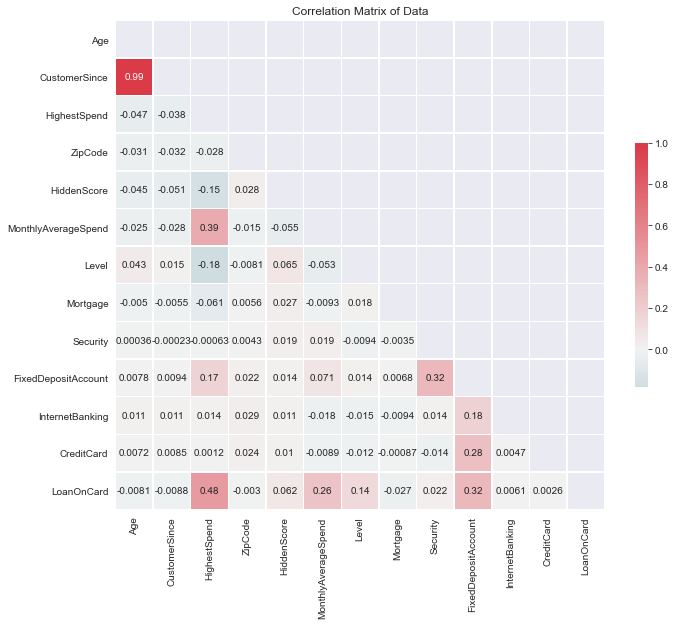

In [71]:
corr = bank.corr()

mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize = (11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap = True)

sns.heatmap(corr, mask = mask, cmap = cmap, vmax = 1, center = 0, square = True, 
            linewidths = .5, cbar_kws = {"shrink": .5}, annot = True)
ax.set_title('Correlation Matrix of Data')

In [72]:
sort = corr.abs().unstack()
sort = sort.sort_values(kind = "quicksort", ascending = False)
sort[(sort > 0.5) & (sort < 1)]

Age            CustomerSince    0.993917
CustomerSince  Age              0.993917
dtype: float64

In [73]:
absCorrwithDep = []
allVars = bank.drop('LoanOnCard', axis = 1).columns

for var in allVars:
    absCorrwithDep.append(abs(bank['LoanOnCard'].corr(bank[var])))

display(pd.DataFrame([allVars, absCorrwithDep], index = ['Variable', 'Correlation']).T.\
        sort_values('Correlation', ascending = False))

Variable Correlation
2          HighestSpend    0.477952
9   FixedDepositAccount     0.31612
5   MonthlyAverageSpend     0.25755
6                 Level    0.137123
4           HiddenScore    0.061865
7              Mortgage    0.026762
8              Security     0.02196
1         CustomerSince    0.008828
0                   Age    0.008115
10      InternetBanking    0.006088
3               ZipCode     0.00298
11           CreditCard    0.002638

* #### The correlation between age and CustomerSince is the highest and any one of those can be dropped
* #### The correlation between the target is the lowest for CreditCard, Zipcode, InternetBanking and Age.We will drop those

In [74]:
# statistical tests here

In [75]:
collist = ['Age','CustomerSince','HighestSpend','MonthlyAverageSpend','Mortgage']

In [76]:
for i in collist:
    a = np.array(bank[bank.LoanOnCard == 0][i]) 
    b = np.array(bank[bank.LoanOnCard == 1][i])
    t, p_value  = stats.ttest_ind(a,b, axis = 0,equal_var=False) 
    print('{} P_Value:{}'.format('\033[1m',p_value))
    if p_value < 0.05:  # Setting our significance level at 5%
        print('{} Rejecting Null Hypothesis.{} of Loan holders and non-Loan holders are not same'.format('\033[1m',i))
    else:
        print('{} Fail to Reject Null Hypothesis.{} of Loan holders and non-Loan holders are  same'.format('\033[1m',i))
    print('\n')

 P_Value:0.570946949557154
 Fail to Reject Null Hypothesis.Age of Loan holders and non-Loan holders are  same


 P_Value:0.5391628628764682
 Fail to Reject Null Hypothesis.CustomerSince of Loan holders and non-Loan holders are  same


 P_Value:7.37188928878198e-182
 Rejecting Null Hypothesis.HighestSpend of Loan holders and non-Loan holders are not same


 P_Value:1.4546851073437998e-39
 Rejecting Null Hypothesis.MonthlyAverageSpend of Loan holders and non-Loan holders are not same


 P_Value:0.043373665803739754
 Rejecting Null Hypothesis.Mortgage of Loan holders and non-Loan holders are not same




In [77]:
catcollist = ['HiddenScore','FixedDepositAccount','Level','InternetBanking','CreditCard','Security']
for i in catcollist:
    crosstab=pd.crosstab(bank['LoanOnCard'],bank[i])
    chi,p_value,dof,expected=stats.chi2_contingency(crosstab)
    if p_value < 0.05:  # Setting our significance level at 5%
        print('{} Rejecting Null Hypothesis. \n There is significant difference in {} Feature for different category of target variable(Loan on card)'.format('\033[1m',i))
    else:
        print('{} Fail to Reject Null Hypothesis.\n There is no significant difference in {} Feature for different category of target variable(Loan on card)'.format('\033[1m',i))
    print('\n')

 Rejecting Null Hypothesis. 
 There is significant difference in HiddenScore Feature for different category of target variable(Loan on card)


 Rejecting Null Hypothesis. 
 There is significant difference in FixedDepositAccount Feature for different category of target variable(Loan on card)


 Rejecting Null Hypothesis. 
 There is significant difference in Level Feature for different category of target variable(Loan on card)


 Fail to Reject Null Hypothesis.
 There is no significant difference in InternetBanking Feature for different category of target variable(Loan on card)


 Fail to Reject Null Hypothesis.
 There is no significant difference in CreditCard Feature for different category of target variable(Loan on card)


 Fail to Reject Null Hypothesis.
 There is no significant difference in Security Feature for different category of target variable(Loan on card)




* The observations from the correlation and statistical tests give us an idea about which features can be dropped. We are         dropping few features because they do not contribute to the target variable as much at the same time deciding not to drop too   many features as it may lead to overfitting. We are dropping CreditCard and Zipcode as it has low correlation with the target   variable and it has no significant difference in target variable. We are also dropping InterBanking and Age as InternetBanking   does not have a significant difference with the target variable. Dropping age as it is highly correlated with CustomerSince  

In [78]:
#dropping the columns which are not needed

bank.drop(['CreditCard','ZipCode','InternetBanking','Age',],axis=1,inplace=True)

In [79]:
#Segregate predictors vs target attributes

X=bank.drop(columns='LoanOnCard')
y=bank['LoanOnCard'] #target

In [80]:
display(y.value_counts(),y.value_counts(normalize = True)*100)

0.0    4499
1.0     480
Name: LoanOnCard, dtype: int64

0.0    90.35951
1.0     9.64049
Name: LoanOnCard, dtype: float64

* ##### There is a large imbalance in the target variable where almost 90 percent of the values belong to class 0. The SMOTENC can be used when there are both categorical and numerical features present in the dataset.

In [81]:
smote_nc=SMOTENC(categorical_features=[2,4,6],random_state=42) #specifying categorical column numbers
x_s,y_s=smote_nc.fit_resample(X,y)

In [82]:
print('After sampling:')
print(y_s.value_counts())

After sampling:
0.0    4499
1.0    4499
Name: LoanOnCard, dtype: int64


In [83]:
#Performing train test split

X_train, X_test, y_train, y_test = train_test_split(x_s, y_s, test_size=0.30, random_state=10)

Logistic Regression Scores with Hyperparameter Tuning


Best Hyper Parameters are:  {'C': 0.1, 'max_iter': 120, 'penalty': 'l2'}
Best Score is:  0.874
LR accuracy for train set: 0.873
LR accuracy for test set: 0.865

              precision    recall  f1-score   support

         0.0       0.87      0.86      0.86      1346
         1.0       0.86      0.87      0.87      1354

    accuracy                           0.86      2700
   macro avg       0.86      0.86      0.86      2700
weighted avg       0.86      0.86      0.86      2700


Confusion Matrix:
 [[1157  189]
 [ 176 1178]]

Accuracy Score:
 0.865


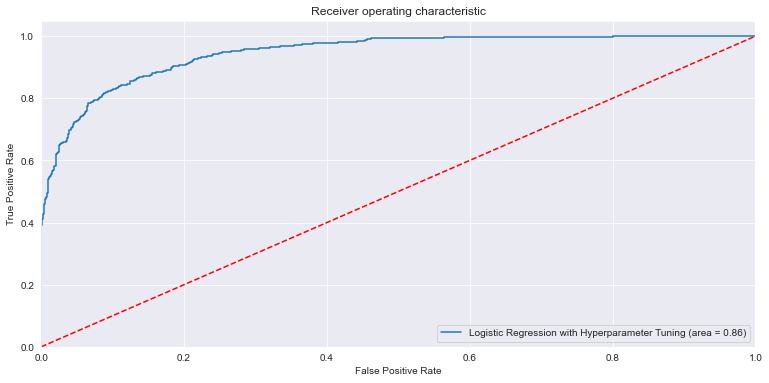

In [84]:
#Creating logistic regression model with GridSearchCV

LR = LogisticRegression(random_state = 42)

params = {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter': [100, 110, 120, 130, 140]}

skf = StratifiedKFold(n_splits = 10)
LR_hyper = GridSearchCV(LR, param_grid = params, n_jobs = -1, cv = skf)

LR_hyper.fit(X_train, y_train)

print('Logistic Regression Scores with Hyperparameter Tuning\n\n')
print('Best Hyper Parameters are: ', LR_hyper.best_params_)
print('Best Score is: ', LR_hyper.best_score_.round(3))

print('LR accuracy for train set: {0:.3f}'.format(LR_hyper.score(X_train, y_train)))
print('LR accuracy for test set: {0:.3f}'.format(LR_hyper.score(X_test, y_test)))

y_true, y_pred = y_test, LR_hyper.predict(X_test)

# Classification Report
print('\n{}'.format(classification_report(y_true, y_pred)))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print('\nConfusion Matrix:\n', cm)

# Accuracy Score
auc = accuracy_score(y_true, y_pred)
print('\nAccuracy Score:\n', auc.round(3))

# ROC Curve
LR_hyper_roc_auc = roc_auc_score(y_true, LR_hyper.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_true, LR_hyper.predict_proba(X_test)[:,1])
plt.figure(figsize = (12.8 , 6))
plt.plot(fpr, tpr, label = 'Logistic Regression with Hyperparameter Tuning (area = {})'.\
         format(LR_hyper_roc_auc.round(2)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = 'lower right')
plt.show()

* A Classification report is used to measure the quality of predictions from a classification algorithm. How many predictions     are True and how many are False. True Positives, False Positives, True negatives and False Negatives are used to predict the     metrics of a classification report


* TN / True Negative: when a case was negative and predicted negative
* TP / True Positive: when a case was positive and predicted positive
* FN / False Negative: when a case was positive but predicted negative
* FP / False Positive: when a case was negative but predicted positive
  
  
* Precision is the ability of a classifier not to label an instance positive that is actually negative. For each class it is  defined as the ratio of true positives to the sum of true and false positives.
* Precision = TP/(TP + FP)


* Recall is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true         positives to the sum of true positives and false negatives.

* Recall = TP/(TP+FN)


* The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0.           F1 scores are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb,     the weighted average of F1 should be used to compare classifier models, not global accuracy.


* F1 Score = 2*(Recall * Precision) / (Recall + Precision)

* ### The Precision,Recall and F1 score for both the classes are good which means that the LogisticRegression is able to          differentiate between both the classes of the target variable with very good accuracy. This model also does not overfit the data

Naive Bayes Classifier Scores


NB accuracy for train set: 0.872
NB accuracy for test set: 0.860

              precision    recall  f1-score   support

         0.0       0.88      0.84      0.86      1346
         1.0       0.85      0.88      0.86      1354

    accuracy                           0.86      2700
   macro avg       0.86      0.86      0.86      2700
weighted avg       0.86      0.86      0.86      2700


Confusion Matrix:
 [[1128  218]
 [ 161 1193]]

Accuracy Score:
 0.86


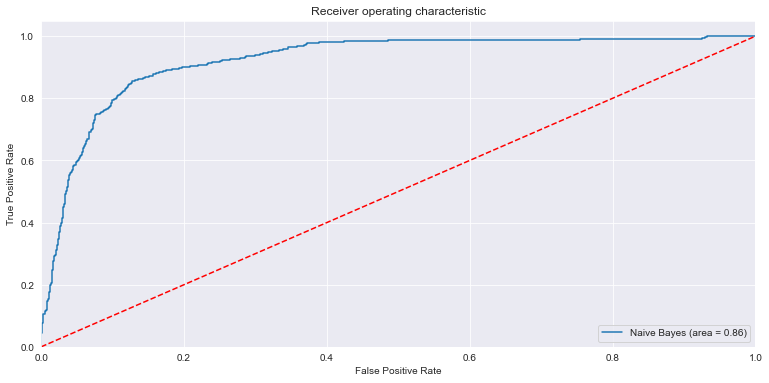

In [85]:
#Creating Naive Bayes Gausian Classifier

NB = GaussianNB()
NB.fit(X_train, y_train)

print('Naive Bayes Classifier Scores\n\n')
print('NB accuracy for train set: {0:.3f}'.format(NB.score(X_train, y_train)))
print('NB accuracy for test set: {0:.3f}'.format(NB.score(X_test, y_test)))

y_true, y_pred = y_test, NB.predict(X_test)

# Classification Report
print('\n{}'.format(classification_report(y_true, y_pred)))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print('\nConfusion Matrix:\n', cm)

# Accuracy Score
auc = accuracy_score(y_true, y_pred)
print('\nAccuracy Score:\n', auc.round(3))

# ROC Curve
NB_roc_auc = roc_auc_score(y_true, NB.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_true, NB.predict_proba(X_test)[:,1])
plt.figure(figsize = (12.8 , 6))
plt.plot(fpr, tpr, label = 'Naive Bayes (area = {})'.\
         format(NB_roc_auc.round(2)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = 'lower right')
plt.show()

* ### The Precision,Recall and F1 score for both the classes are good which means that the LogisticRegression is able to          differentiate between both the classes of the target variable with very good accuracy. This model also does not overfit the data. The accuracy of the Naive Bayes model is almost as same as the LogisticRegression Model.

In [86]:
# Creating SVM model and hyperparameter tuning with GridSearchCV

svm = SVC(random_state = 42)

params = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

skf = StratifiedKFold(n_splits = 10)
svm_hyper = GridSearchCV(svm, param_grid = params, n_jobs = -1, cv = skf)

svm_hyper.fit(X_train, y_train)

print('SVM Scores with Hyperparameter Tuning\n\n')
print('Best Hyper Parameters are: ', svm_hyper.best_params_)
print('Best Score is: ', svm_hyper.best_score_.round(3))

print('SVM accuracy for train set: {0:.3f}'.format(svm_hyper.score(X_train, y_train)))
print('SVM accuracy for test set: {0:.3f}'.format(svm_hyper.score(X_test, y_test)))

y_true, y_pred = y_test, svm_hyper.predict(X_test)

# Classification Report
print('\n{}'.format(classification_report(y_true, y_pred)))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print('\nConfusion Matrix:\n', cm)

# Accuracy Score
auc = accuracy_score(y_true, y_pred)
print('\nAccuracy Score:\n', auc.round(3))


SVM Scores with Hyperparameter Tuning


Best Hyper Parameters are:  {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
Best Score is:  0.965
SVM accuracy for train set: 0.999
SVM accuracy for test set: 0.964

              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96      1346
         1.0       0.96      0.97      0.96      1354

    accuracy                           0.96      2700
   macro avg       0.96      0.96      0.96      2700
weighted avg       0.96      0.96      0.96      2700


Confusion Matrix:
 [[1284   62]
 [  36 1318]]

Accuracy Score:
 0.964


* ### The Precision,Recall and F1 score for both the classes are very high when compared to all the other models,there is almost 10 percent jump in all the metrics. This model also does not overfit the data. The accuracy of this model is very high and also it does not overfit the data.

In [87]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

In [88]:
Xm = sc.fit_transform(x_s)

In [89]:
Xm.shape

(8998, 8)

In [97]:
myList = list(range(1,53))
neighbors = list(filter(lambda x: x % 2 != 0, myList))

In [98]:
#Performing train test split

X_train, X_test, y_train, y_test = train_test_split(Xm, y_s, test_size=0.30, random_state=10)

In [99]:
ac_scores = []
for k in neighbors:
    KNN_N = KNeighborsClassifier(n_neighbors= k , metric = 'euclidean' ) 
    KNN_N.fit(X_train, y_train)
    y_pred = KNN_N.predict(X_test)
    scores = accuracy_score(y_test, y_pred)
    ac_scores.append(scores)

MSE = [1 - x for x in ac_scores]
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 1


k-Nearest Neighbor Classifier Scores With Oversampling (SMOTE) and Hyperparameter Tuning


Best Hyper Parameters are:  {'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'uniform'}

Best Score is:  0.969
k-NN accuracy for train set: 1.000
k-NN accuracy for test set: 0.965

              precision    recall  f1-score   support

         0.0       0.97      0.96      0.96      1346
         1.0       0.96      0.97      0.96      1354

    accuracy                           0.96      2700
   macro avg       0.96      0.96      0.96      2700
weighted avg       0.96      0.96      0.96      2700


Confusion Matrix:
 [[1297   49]
 [  46 1308]]

Accuracy Score:
 0.965


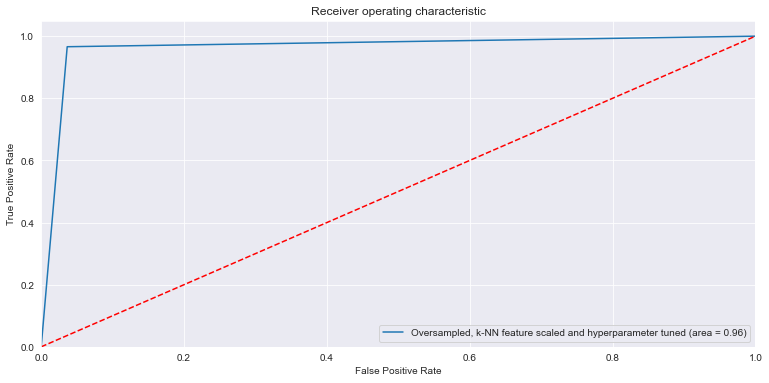

In [100]:
#creating KNN classifier With GridSearchCV

KNN = KNeighborsClassifier(n_jobs = -1)

params = {'n_neighbors': list(range(1, 40, 2)), 'weights': ['uniform', 'distance'],
          'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

skf = StratifiedKFold(n_splits = 10, random_state = 42)
KNN_hyper = GridSearchCV(KNN, param_grid = params, n_jobs = -1, cv = skf)

KNN_hyper.fit(X_train, y_train)

print('k-Nearest Neighbor Classifier Scores With Oversampling (SMOTE) and Hyperparameter Tuning\n\n')
print('Best Hyper Parameters are: ', KNN_hyper.best_params_)
print('\nBest Score is: ', KNN_hyper.best_score_.round(3))

print('k-NN accuracy for train set: {0:.3f}'.format(KNN_hyper.score(X_train, y_train)))
print('k-NN accuracy for test set: {0:.3f}'.format(KNN_hyper.score(X_test, y_test)))

y_true, y_pred = y_test, KNN_hyper.predict(X_test)

# Classification Report
print('\n{}'.format(classification_report(y_true, y_pred)))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print('\nConfusion Matrix:\n', cm)

# Accuracy Score
auc = accuracy_score(y_true, y_pred)
print('\nAccuracy Score:\n', auc.round(3))

# ROC Curve
KNN_hyper_roc_auc = roc_auc_score(y_true, KNN_hyper.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_true, KNN_hyper.predict_proba(X_test)[:,1])
plt.figure(figsize = (12.8 , 6))
plt.plot(fpr, tpr, label = 'Oversampled, k-NN feature scaled and hyperparameter tuned (area = {})'.\
         format(KNN_hyper_roc_auc.round(2)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = 'lower right')
plt.show()

* ### The Precision,Recall and F1 score for both the classes are very high when compared to all the previous models. This model also is overfitting the data since the in sample accuracy is 100 percent whereas the out of sample accuracy is 96 percent. This model will overfit the data

* # We will choose the svm model with parameters as 'C'= 1000, 'gamma'= 0.01, 'kernel'='rbf'. SInce it has the best accuracy precision and recall out of all the models and also does not overfit the data.

* ## Features like Size of the family, CreditScore,Annual Salary, Salaried people in the family can all be included as this might reinforce our model even more
* ## Data in Zipcode for a single record is wrong, this can be corrected. Data in CustomerSince is less than zero and almost 20 values of the target class were nulls. All these can be corrected.
* ## More details on the Columns like HiddenScore and Level on whether they are ordinal or nominal would prove helpful in the analysis
* ## The target classes should also be balanced